

This is to prepare a dataset and train a Machine Learning algorithm on the dataset to accurately predict **median house value**.
 


 

**Requirements:**


	
	
1. Import necessary libraries for the machine learning project.
	
	
	
2. Read and apply necessary preprocessing steps on the dataset:
    1. Drop the following columns (`longitude`, `latitude`)
		
	2. Convert the words in the `ocean_proximity` column to numeric values.
		
	3. Normalize the dataset (make sure to print info and descriptions with the histogram for the dataset).
		
	
	
	
3. Split the dataset using a 80/20 training/testing split (don't forget to set the `random_state` to 42).
	
	
	
4. Create and train 4 Machine Learning models.
	
	
	
5. Use the right evaluation metrics to choose the best model (write down your choice for the best model).
	




[Dataset](https://docs.google.com/spreadsheets/d/1bc0on1l8EUUPXyzTV3A09Dj07uzZAy88wSU8SoxRBGo/edit?usp=sharing)



# Upload the dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving housing - housing.csv to housing - housing (1).csv
User uploaded file "housing - housing.csv" with length 1195688 bytes


# Import necessary libraries for the machine learning project.

In [ ]:
from sklearn import datasets,model_selection,preprocessing,linear_model,metrics,neighbors,tree,svm,ensemble
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read and apply necessary preprocessing steps on the dataset

In [ ]:
# read the csv file 
data=pd.read_csv('/content/housing - housing.csv')
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [ ]:
# print the head of the data 
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
# print the describe of the dataframe 
data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# print the info of the dataframe
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
# drop the longitude, latitude columns 
drop_columns=['longitude','latitude']
data.drop(drop_columns,axis=1,inplace=True)


In [ ]:
# print the info of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  int64  
 1   total_rooms         20640 non-null  int64  
 2   total_bedrooms      20433 non-null  float64
 3   population          20640 non-null  int64  
 4   households          20640 non-null  int64  
 5   median_income       20640 non-null  float64
 6   median_house_value  20640 non-null  int64  
 7   ocean_proximity     20640 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [ ]:
# count how many nan values are in the dataframe
data.isna().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# fill the nan values with the mean of the 
data.fillna(data['total_bedrooms'].mean(),inplace=True)

In [ ]:
# count how many nan values are in the dataframe
data.isna().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:

# convert the words to numerical values 
# Create function that return two dictionary word to index and the other index to word 
def string_to_numerics(column):
  set_column=set(column)
  index_word = {}
  word_index = {}

  # Get the unique words
 
  for i,w in enumerate(set_column):
    index_word[i]=w
    word_index[w]=i
  column=column.replace(word_index)
  print(index_word)  



  # Return word to index & index to word
  return column,word_index, index_word

In [ ]:

#convert the string to numeric
data.ocean_proximity,ocean_proximity_word_index,ocean_proximity_index_word=string_to_numerics(data.ocean_proximity)

{0: 'ISLAND', 1: 'NEAR OCEAN', 2: '<1H OCEAN', 3: 'INLAND', 4: 'NEAR BAY'}


In [ ]:
# print the dataframe
data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41,880,129.0,322,126,8.3252,452600,4
1,21,7099,1106.0,2401,1138,8.3014,358500,4
2,52,1467,190.0,496,177,7.2574,352100,4
3,52,1274,235.0,558,219,5.6431,341300,4
4,52,1627,280.0,565,259,3.8462,342200,4
...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,78100,3
20636,18,697,150.0,356,114,2.5568,77100,3
20637,17,2254,485.0,1007,433,1.7000,92300,3
20638,18,1860,409.0,741,349,1.8672,84700,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e984990d0>,
      dtype=object)

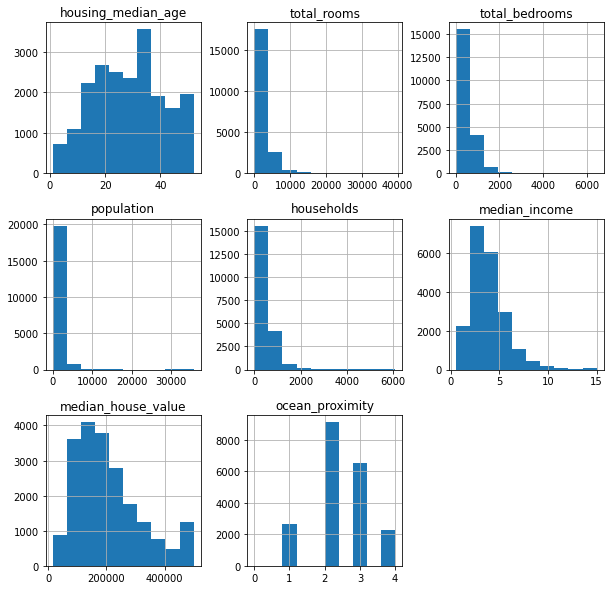

In [ ]:
# plot the hist for the dataframe 
data.hist(figsize=(10,10))

In [ ]:
# split the dataset to x and y 
column_sels = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']
x = data.loc[:,column_sels]
y = data['median_house_value']

In [ ]:
x

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,41,880,129.0,322,126,8.3252,4
1,21,7099,1106.0,2401,1138,8.3014,4
2,52,1467,190.0,496,177,7.2574,4
3,52,1274,235.0,558,219,5.6431,4
4,52,1627,280.0,565,259,3.8462,4
...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,3
20636,18,697,150.0,356,114,2.5568,3
20637,17,2254,485.0,1007,433,1.7000,3
20638,18,1860,409.0,741,349,1.8672,3


In [ ]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

In [ ]:

print('shape x: ',x.shape)
print('shape y: ',y.shape)

shape x:  (20640, 7)
shape y:  (20640,)


# Split the dataset to 20% for testing and 80% for training.

In [ ]:
# normalize the values of x 
x_normalize=preprocessing.StandardScaler()
x_normalize.fit(x)
x_norm=x_normalize.transform(x)

In [ ]:
print(x_norm)

[[ 0.98214266 -0.8048191  -0.97522785 ... -0.97703285  2.34476576
   1.870145  ]
 [-0.60701891  2.0458901   1.3550882  ...  1.66996103  2.33223796
   1.870145  ]
 [ 1.85618152 -0.53574589 -0.82973217 ... -0.84363692  1.7826994
   1.870145  ]
 ...
 [-0.92485123 -0.17499526 -0.12610552 ... -0.17404163 -1.14259331
   0.69393167]
 [-0.84539315 -0.35559977 -0.30737883 ... -0.39375258 -1.05458292
   0.69393167]
 [-1.00430931  0.06840827  0.18635241 ...  0.07967221 -0.78012947
   0.69393167]]


In [ ]:
# normalize the values of y
y_normalize= preprocessing.MinMaxScaler()
y_normalize.fit(y.values.reshape(-1,1))
y_norm= y_normalize.transform(y.values.reshape(-1,1))

In [ ]:
print(y_norm)

[[0.90226638]
 [0.70824656]
 [0.69505074]
 ...
 [0.15938285]
 [0.14371281]
 [0.15340349]]


(array([[1.3472e+04, 7.1680e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.6991e+04, 3.4300e+03, 1.7300e+02, 3.4000e+01, 9.0000e+00,
         3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.6771e+04, 3.6320e+03, 1.9700e+02, 3.1000e+01, 8.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.6785e+04, 3.6410e+03, 1.8100e+02, 2.6000e+01, 5.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00],
        [1.6705e+04, 3.7190e+03, 1.7600e+02, 3.1000e+01, 8.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.5545e+04, 4.9410e+03, 1.5400e+02, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.1799e+04, 8.8410e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]),
 array([-2.83470831,  0.4

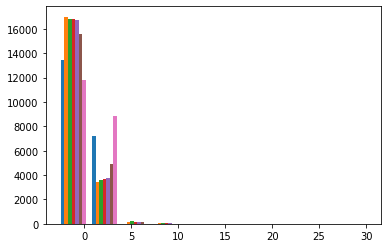

In [ ]:
# plot the hist for the normalized x 
plt.hist(x_norm)

In [ ]:
# split the data to train and test 
x_train, x_test, y_train, y_test=model_selection.train_test_split(x_norm,y_norm,test_size=0.2,random_state=42)


# Create and train 4 Machine Learning models.


##1-LinearRegression

In [ ]:
#Create LinearRegression
model=linear_model.LinearRegression()
# Train the model using the training sets
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Predict Output
y_pred=model.predict(x_test)

###testing

In [ ]:

print(f'the mse is : {metrics.mean_squared_error(y_test,y_pred)}')
print(f'the r2  is : {metrics.r2_score(y_test,y_pred)}')

the mse is : 0.024889583169133353
the r2  is : 0.5532157834640541


##2-KNN

In [ ]:
#Create KNN
model=neighbors.KNeighborsRegressor(n_neighbors=7)
# Train the model using the training sets
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
#Predict Output
y_pred=model.predict(x_test)

###testing

In [ ]:
print(f'the mse is : {metrics.mean_squared_error(y_test,y_pred)}')
print(f'the r2  is : {metrics.r2_score(y_test,y_pred)}')

the mse is : 0.018288776203188337
the r2  is : 0.6717045644430022


##3-DecisionTreeRegressor

In [ ]:
#Create DecisionTreeRegressor
model=tree.DecisionTreeRegressor()
# Train the model using the training sets
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Predict Output
y_pred=model.predict(x_test)

###testing

In [ ]:
print(f'the mse is : {metrics.mean_squared_error(y_test,y_pred)}')
print(f'the r2  is : {metrics.r2_score(y_test,y_pred)}')

the mse is : 0.032981837416268714
the r2  is : 0.4079545531233313


##4-SVR

In [ ]:
#Create SVR
model=svm.SVR(C=1)
# Train the model using the training sets
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1)

In [ ]:
#Predict Output
y_pred=model.predict(x_test)

###testing

In [ ]:
print(f'the mse is : {metrics.mean_squared_error(y_test,y_pred)}')
print(f'the r2  is : {metrics.r2_score(y_test,y_pred)}')

the mse is : 0.016307319657916305
the r2  is : 0.7072729990030983


##5-RandomForest

In [ ]:
#Create SVR
model=ensemble. RandomForestRegressor(max_depth=2, random_state=42)
# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output
y_pred=model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


###testing

In [ ]:
print(f'the mse is : {metrics.mean_squared_error(y_test,y_pred)}')
print(f'the r2  is : {metrics.r2_score(y_test,y_pred)}')


the mse is : 0.03130931640590003
the r2  is : 0.43797739377034484


# Use the right evaluation metrics to choose the best model.

In [ ]:
# the best model is SVR